In [1]:
from sklearn.utils import resample
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import load_wine
wine_data = load_wine()
print(wine_data.keys())
#data.target[[10, 80, 140]]
#array([0, 1, 2])
#>>> list(data.target_names)
#['class_0', 'class_1', 'class_2']

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])


In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.naive_bayes import GaussianNB

In [5]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score

In [6]:
gnb = GaussianNB()

In [7]:
print(wine_data['feature_names'])

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [140]:
X = wine_data['data'][:,0:5]

In [83]:
y = (wine_data['target'] == 1).astype(int)

In [141]:
X.shape

(178, 5)

In [85]:
from collections import Counter

In [136]:
Counter(wine_data['target'])

Counter({0: 59, 1: 71, 2: 48})

In [86]:
Counter(y)

Counter({0: 107, 1: 71})

In [92]:
71/107.

0.6635514018691588

### Bootstrapping

##### Run bootstrapping 1000 times

In [87]:
sample_size=1000

##### Get 1000 train sets

In [142]:
train_idx = [np.random.randint(0, X.shape[0], size=X.shape[0]) for i in range(sample_size)]

##### Get 1000 out-of-bag (i.e. not contained in training set) samples to calculate error metrics

In [143]:
oob_idx = [list(set(range(X.shape[0])) - set(train_idx[i])) for i in range(sample_size)]

In [147]:
X.shape

(178, 5)

#### Perform bootstrapping
##### For each of the train/oob-split
* train and predict
* calculate precision and recall for different thresholds
* save precision and recall per threshold for all 1000 runs

In [144]:
preds=[]
trues=[]
precs=[]
recs=[]
for train_inds, test_inds in zip(train_idx, oob_idx):
    gnb.fit(X[train_inds,:], y[train_inds])
    pred = gnb.predict_proba(X[test_inds,:])[:,1]
    true = y[test_inds]
    preds.append(pred)
    trues.append(true)
    recs_temp=[]
    precs_temp=[]
    #for each threshold, calculate precision and recall and then append to a final list
    for thresh in np.linspace(0,1,100):
        precs_temp.append(precision_score(true, (pred>=thresh).astype(int)))
        recs_temp.append(recall_score(true, (pred>=thresh).astype(int)))
    precs.append(precs_temp)
    recs.append(recs_temp)

In [145]:
stats_prec = pd.DataFrame(precs).T

In [148]:
stats_prec.head()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,0.338235,0.476190,0.417910,0.500000,0.415385,0.290323,0.397059,0.350000,0.396825,0.411765,...,0.372881,0.378788,0.446154,0.322034,0.385714,0.375000,0.378788,0.353846,0.507692,0.430769
1,0.377049,0.600000,0.622222,0.763158,0.600000,0.425000,0.520000,0.552632,0.471698,0.574468,...,0.567568,0.500000,0.547170,0.422222,0.456140,0.605263,0.500000,0.403509,0.704545,0.518519
2,0.425926,0.612245,0.642857,0.777778,0.600000,0.444444,0.568182,0.606061,0.555556,0.613636,...,0.583333,0.534884,0.568627,0.463415,0.500000,0.638889,0.555556,0.433962,0.720930,0.583333
3,0.450980,0.625000,0.692308,0.777778,0.642857,0.457143,0.609756,0.606061,0.581395,0.658537,...,0.600000,0.550000,0.580000,0.475000,0.520000,0.657143,0.581395,0.450980,0.738095,0.595745
4,0.500000,0.638298,0.692308,0.771429,0.675000,0.483871,0.657895,0.689655,0.625000,0.675000,...,0.606061,0.594595,0.644444,0.513514,0.541667,0.657143,0.615385,0.489362,0.738095,0.595745


In [149]:
stats_prec.tail()

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
95,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.9,1.0,1.0,1.0,0.954545,0.833333,1.0,1.0,1.0,1.0
96,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,0.952381,0.833333,1.0,1.0,1.0,1.0
97,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,0.833333,1.0,1.0,1.0,1.0
98,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.000000,1.000000,1.0,1.0,1.0,1.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0


Text(0, 0.5, 'Number of bootstrapping runs')

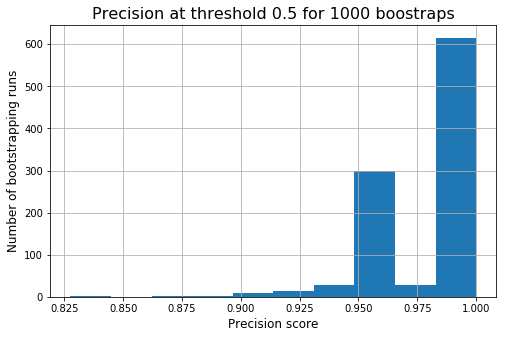

In [128]:
# Look at precision distribution for threshold = 0.5
stats_prec.loc[50].hist(figsize=(8,5))
plt.title('Precision at threshold 0.5 for 1000 boostraps', fontsize=16)
plt.xlabel('Precision score', fontsize=12)
plt.ylabel('Number of bootstrapping runs', fontsize=12)

### Look at confidence intervals for precision

In [150]:
stats_prec['conf_int_up'] = stats_prec.apply(lambda x: np.nanquantile(x, .975), axis=1)
stats_prec['conf_int_down'] = stats_prec.apply(lambda x: np.nanquantile(x, .25), axis=1)
stats_prec['mean'] = stats_prec[np.arange(0,sample_size)].mean(1)

(0, 1.1)

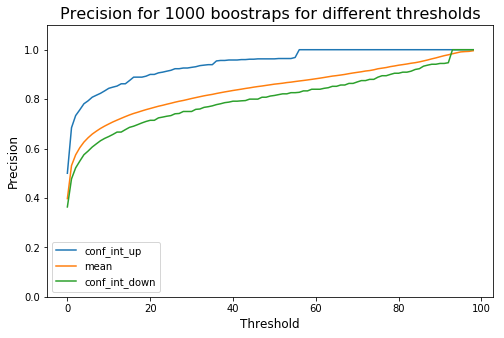

In [151]:
stats_prec[['conf_int_up', 'mean', 'conf_int_down']].loc[0:98].plot(figsize=(8,5))
plt.title('Precision for 1000 boostraps for different thresholds', fontsize=16)
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.ylim(0,1.1)

In [152]:
stats_rec = pd.DataFrame(recs).T

In [153]:
stats_rec['conf_int_up'] = stats_rec.apply(lambda x: np.nanquantile(x, .975), axis=1)
stats_rec['conf_int_down'] = stats_rec.apply(lambda x: np.nanquantile(x, .25), axis=1)
stats_rec['mean'] = stats_rec[np.arange(0,sample_size)].mean(1)
#stats_rec['stdev'] = stats_rec[np.arange(0,sample_size)].std(1)
#stats_rec['stdev_up'] = stats_rec[np.arange(0,sample_size)].mean(1) + stats_rec[np.arange(0,sample_size)].std(1)
#stats_rec['stdev_down'] = stats_rec[np.arange(0,sample_size)].mean(1) - stats_rec[np.arange(0,sample_size)].std(1)
#stats_rec['conf_int_up2'] = stats_rec[np.arange(0,sample_size)].mean(1) + 1.96*stats_rec[np.arange(0,sample_size)].std(1)
#stats_rec['conf_int_down2'] = stats_rec[np.arange(0,sample_size)].mean(1) - 1.96*stats_rec[np.arange(0,sample_size)].std(1)

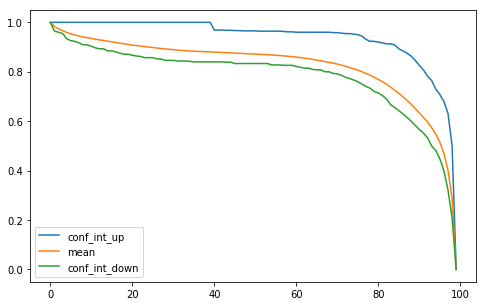

In [154]:
stats_rec[['conf_int_up', 'mean', 'conf_int_down']].loc[0:99].plot(figsize=(8,5))

(0.7, 1.03)

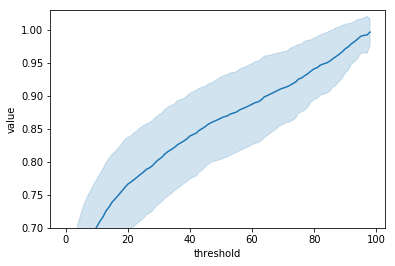

In [177]:
#pd.melt(stats_prec.loc[1:98][np.arange(0,178)].reset_index().)#.plot(legend=False, figsize=(10,8))
sns.lineplot(data=pd.melt(stats_prec.loc[0:98][np.arange(0,178)].reset_index()\
                    .rename(columns={'index': 'threshold'}), id_vars='threshold'), x='threshold', y='value', ci='sd')
plt.ylim(0.7,1.03)

(0.7, 1.03)

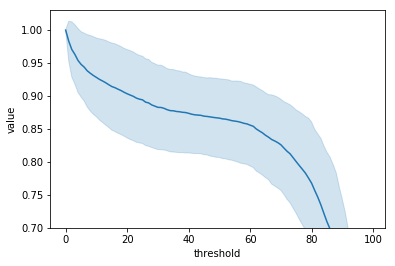

In [178]:
sns.lineplot(data=pd.melt(stats_rec.loc[0:99][np.arange(0,178)].reset_index()\
                    .rename(columns={'index': 'threshold'}), id_vars='threshold'), x='threshold', y='value', ci='sd')
plt.ylim(0.7,1.03)

## Do the same on a toy dataset with a RANDOM CLASSIFIER

### Create labels
#### Assume equal class distribution (500 positive, 500 negatives)

In [63]:
true_labels =  np.random.choice(np.concatenate([np.repeat(0,500),np.repeat(1,500)]), 1000, replace=False)

### Sample labels

In [69]:
preds=[]
for i in np.arange(0,500):
    preds.append(np.random.randint(0,101,size=1000)/100)

In [65]:
precs=[]
recs=[]
for pred in preds:
    recs_temp=[]
    precs_temp=[]
    for thresh in np.linspace(0,1,100):
        precs_temp.append(precision_score(true_labels, (pred>=thresh).astype(int)))
        recs_temp.append(recall_score(true_labels, (pred>=thresh).astype(int)))
    precs.append(precs_temp)
    recs.append(recs_temp)

(array([ 93.,  99., 119.,  86., 113., 110., 112.,  77.,  82., 109.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

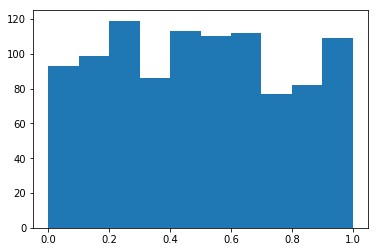

In [70]:
plt.hist(preds[0])

In [66]:
df_precs2 = pd.DataFrame(precs).T.reset_index().rename(columns={'index': 'threshold'})

##### For a random classifier, the precision is first always equal to the class distribution (more precisely to the proportion of positive samples in the data set) and then, the less samples you select for evaluation, the more it wobbles cause the distribution changes

### !!!! *** the precision is first equal to the proportion of positive samples in the data set***: This is dangerous, when the positive class is overly represented!

(0, 1)

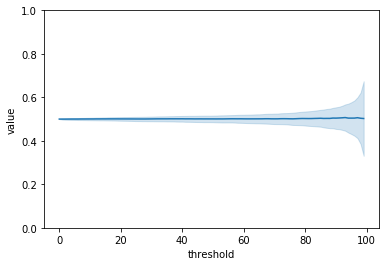

In [67]:
sns.lineplot(data=pd.melt(df_precs2, id_vars='threshold'), x='threshold', y='value', ci='sd')
plt.ylim(0,1)

##### For a random classifier, the recall wobble most at medium thresholds , for higher threshold, TP and FN decrease

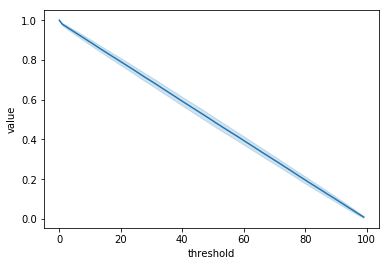

In [54]:
sns.lineplot(data=pd.melt(pd.DataFrame(recs).T.reset_index().rename(columns={'index': 'threshold'}),
                          id_vars='threshold'), x='threshold', y='value', ci='sd')

### Create labels
#### Assume equal class distribution (150 positive, 850 negatives)

In [55]:
true_labels =  np.random.choice(np.concatenate([np.repeat(0,850),np.repeat(1,150)]), 1000, replace=False)

### Sample labels

In [56]:
preds=[]
for i in np.arange(0,500):
    preds.append(np.random.randint(0,101,size=1000)/100)

In [57]:
precs=[]
recs=[]
for pred in preds:
    recs_temp=[]
    precs_temp=[]
    for thresh in np.linspace(0,1,100):
        precs_temp.append(precision_score(true_labels, (pred>=thresh).astype(int)))
        recs_temp.append(recall_score(true_labels, (pred>=thresh).astype(int)))
    precs.append(precs_temp)
    recs.append(recs_temp)

In [58]:
df_precs2 = pd.DataFrame(precs).T.reset_index().rename(columns={'index': 'threshold'})

##### For a random classifier, the precision is first always equal to the class distribution (more precisely to the proportion of positive samples in the data set) and then, the less samples you select for evaluation, the more it wobbles cause the distribution changes

### !!!! *** the precision is first equal to the proportion of positive samples in the data set***: This is dangerous, when the positive class is overly represented!

(0, 1)

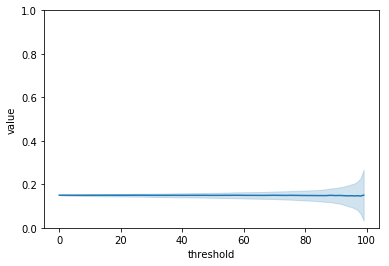

In [61]:
sns.lineplot(data=pd.melt(df_precs2, id_vars='threshold'), x='threshold', y='value', ci='sd')
plt.ylim(0,1)

##### For a random classifier, the recall wobble most at medium thresholds , for higher threshold, TP and FN decrease

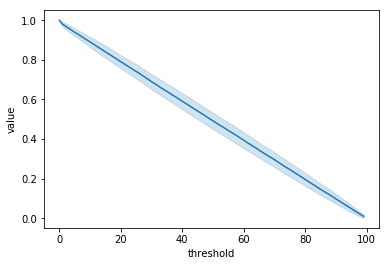

In [60]:
sns.lineplot(data=pd.melt(pd.DataFrame(recs).T.reset_index().rename(columns={'index': 'threshold'}), id_vars='threshold'), x='threshold', y='value', ci='sd')